### Make a map

In [ ]:
import maria

sim = maria.Simulation(

        # Mandatory minimal weither settings
        # ---------------------
        array    = 'MUSTANG-2',
        pointing = 'DAISY_2deg',
        site     = 'GBT',
        
        # True sky input
        # ---------------------
        map_file     = "/users/tom/src/maria/maps/protocluster.fits", #input files must be a fits file
        # map_file     = "/Users/jvanmarr/Documents/GitHub/maria/maps/ACT0329_CL0035.097.z_036.00GHz.fits", #input files must be a fits file
        map_center   = (4, 10.5), # RA & Dec in degree

        # Defeault Observational setup
        # ----------------------------
        integration_time = 600,         # seconds
        pointing_center = (4, 10.5),    # degrees
        pointing_frame  = "ra_dec",     # frame
        pointing_throws = (1., 1.),     # How large the scanning pattern is in degree

        # Additional inputs:
        # ----------------------
        quantiles    = {'column_water_vapor' : 0.5},  # Weather conditions specific for that site
        map_units    = 'Jy/pixel',                    # Kelvin Rayleigh Jeans (KRJ, defeault) or Jy/pixel 
        # map_inbright = -5.37 * 1e3 * 0.000113,        # In units of the map_units key
        map_res      = 2 / 1000,                    # degree, overwrites header information
    )

In [ ]:
tods = []

for i in range(4):

    tod = sim.run()
    
    tods.append(tod)

In [9]:
import numpy as np
from maria import mappers

mapper = mappers.BinMapper(resolution=np.radians(0.5/60))

mapper.add_tods(tods)

mapper.run()

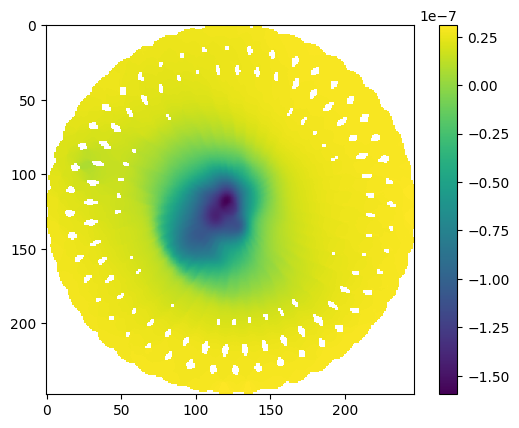

In [10]:
import matplotlib.pyplot as plt
plt.imshow(mapper.maps["93GHz"])
plt.colorbar()